In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from random import randint
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

plt.rcParams["figure.figsize"] = (20, 16)
warnings.simplefilter("ignore")
files = [i for i in os.listdir("Mesures") if i.endswith(".csv") ]
files

### <8 mbits en cumsum = bruit 

['messenger20221117_125310.csv',
 'messenger20221124_143112.csv',
 'messenger20221124_151137.csv',
 'messenger20221125_130559.csv',
 'messenger20221125_150706.csv',
 'messenger20221129_131204.csv',
 'messenger20221129_151124.csv',
 'skype20221129_164105.csv',
 'twitch20221117_113554.csv',
 'twitch20221118_075454.csv',
 'twitch20221124_163054.csv',
 'twitch20221125_133859.csv',
 'youtube20221108_165214.csv',
 'youtube20221108_182416.csv',
 'youtube20221118_104205.csv',
 'youtube20221124_125524.csv',
 'youtube20221124_154037.csv',
 'youtube20221130_103723.csv']

In [2]:
current_file = 'youtube20221124_154037.csv'
file_path = os.path.join("Mesures", current_file)
data = pd.read_csv(file_path)
#data = pd.read_csv('output.csv')

data

,Time,rnti,SFN,format,preamble,ta,nb_TB,MCSi_1,MCSi_2,TBS_1,TBS_2,nb_PRB,connection_id,label,id_acquisition
0,2022-11-24 14:40:51.871,396,7839,2.0,26.0,4.0,1,1,-2,208,-2,6,4,noise,20221124_154037
1,2022-11-24 14:40:51.896,396,7864,0.0,26.0,4.0,1,12,-2,176,-2,1,4,noise,20221124_154037
2,2022-11-24 14:40:51.904,396,7872,0.0,26.0,4.0,1,12,-2,176,-2,1,4,noise,20221124_154037
3,2022-11-24 14:40:51.912,396,7880,2.0,26.0,4.0,1,17,-2,280,-2,1,4,noise,20221124_154037
4,2022-11-24 14:40:51.914,396,7882,2.0,26.0,4.0,1,1,-2,224,-2,7,4,noise,20221124_154037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62261,2022-11-24 15:23:09.516,396,5964,0.0,26.0,4.0,1,6,-2,256,-2,3,4,noise,20221124_154037
62262,2022-11-24 15:23:09.524,396,5972,2.0,26.0,4.0,1,14,-2,224,-2,1,4,noise,20221124_154037
62263,2022-11-24 15:23:09.551,396,5999,2.0,26.0,4.0,1,29,-2,224,-2,1,4,noise,20221124_154037
62264,2022-11-24 15:23:09.576,396,6024,0.0,26.0,4.0,1,22,-2,1384,-2,3,4,noise,20221124_154037


In [3]:
global_data = pd.concat([pd.read_csv(os.path.join("Mesures",filename)) for filename in tqdm(files) ]) 


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:40<00:00,  2.27s/it]


In [4]:
global_data["uniq_k"] = global_data["id_acquisition"] + global_data["connection_id"].apply(lambda x : "_"+str(x))

global_data["TBS_2"] = global_data["TBS_2"].replace(to_replace = -2, value = 0)
global_data["TBS_1"] = global_data["TBS_1"].replace(to_replace = -2, value = 0)

global_data.drop(inplace = True, columns = ["SFN", "rnti", "preamble", "MCSi_1", "MCSi_2",
                                            "nb_PRB", "connection_id", "id_acquisition"])
global_data.reset_index(drop = True, inplace = True)
global_data

,Time,format,ta,nb_TB,TBS_1,TBS_2,label,uniq_k
0,2022-11-17 11:53:53.714,0.0,3.0,1,376,0,noise,20221117_125310_4
1,2022-11-17 11:53:53.722,2.0,3.0,1,224,0,noise,20221117_125310_4
2,2022-11-17 11:53:53.724,2.0,3.0,1,224,0,noise,20221117_125310_4
3,2022-11-17 11:53:53.734,0.0,3.0,1,376,0,noise,20221117_125310_4
4,2022-11-17 11:53:53.762,2.0,3.0,1,224,0,noise,20221117_125310_4
...,...,...,...,...,...,...,...,...
21428077,2022-11-30 10:21:59.229,0.0,4.0,1,520,0,noise,20221130_103723_49
21428078,2022-11-30 10:21:59.237,2.0,4.0,1,224,0,noise,20221130_103723_49
21428079,2022-11-30 10:21:59.252,2.0,4.0,1,224,0,noise,20221130_103723_49
21428080,2022-11-30 10:21:59.253,2.0,4.0,1,224,0,noise,20221130_103723_49


In [5]:
global_data.describe(percentiles = 0.1*np.arange(10))

,format,ta,nb_TB,TBS_1,TBS_2
count,2.142808e+07,2.142808e+07,2.142808e+07,2.142808e+07,2.142808e+07
mean,1.117019e+00,3.732474e+00,1.000162e+00,3.170496e+03,1.009610e+00
std,9.950990e-01,6.314982e-01,1.273908e-02,4.585095e+03,1.061122e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
0%,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
10%,0.000000e+00,3.000000e+00,1.000000e+00,2.080000e+02,0.000000e+00
20%,0.000000e+00,3.000000e+00,1.000000e+00,2.560000e+02,0.000000e+00
30%,0.000000e+00,3.000000e+00,1.000000e+00,3.920000e+02,0.000000e+00
40%,0.000000e+00,4.000000e+00,1.000000e+00,6.800000e+02,0.000000e+00
50%,2.000000e+00,4.000000e+00,1.000000e+00,1.384000e+03,0.000000e+00


In [6]:
global_data.TBS_2.value_counts()

0        21424626
8760          281
3112          266
6456          258
2216          240
           ...   
1672            1
1128            1
37888           1
696             1
376             1
Name: TBS_2, Length: 139, dtype: int64

In [7]:
global_data

,Time,format,ta,nb_TB,TBS_1,TBS_2,label,uniq_k
0,2022-11-17 11:53:53.714,0.0,3.0,1,376,0,noise,20221117_125310_4
1,2022-11-17 11:53:53.722,2.0,3.0,1,224,0,noise,20221117_125310_4
2,2022-11-17 11:53:53.724,2.0,3.0,1,224,0,noise,20221117_125310_4
3,2022-11-17 11:53:53.734,0.0,3.0,1,376,0,noise,20221117_125310_4
4,2022-11-17 11:53:53.762,2.0,3.0,1,224,0,noise,20221117_125310_4
...,...,...,...,...,...,...,...,...
21428077,2022-11-30 10:21:59.229,0.0,4.0,1,520,0,noise,20221130_103723_49
21428078,2022-11-30 10:21:59.237,2.0,4.0,1,224,0,noise,20221130_103723_49
21428079,2022-11-30 10:21:59.252,2.0,4.0,1,224,0,noise,20221130_103723_49
21428080,2022-11-30 10:21:59.253,2.0,4.0,1,224,0,noise,20221130_103723_49


In [18]:
tmp_data = global_data[global_data.index<15000000]
tmp_data = global_data

#time_series



In [19]:

def put_good_format(old_data) :
    time_series = []
    
    data = old_data.copy(deep = True)
    
    uniq_values = data.uniq_k.unique()
    for id_time_serie in tqdm(uniq_values) :
        interesting_index = data["uniq_k"]==id_time_serie
        
        time_serie = data[interesting_index]
        label = time_serie.label.value_counts().index[0]
        #time_serie.reset_index(drop = True, inplace = True)
        #data = data[~interesting_index] # in order to reduce time ?

        time_series.append((time_serie.TBS_1,label, id_time_serie))
    
    
    time_series = [pd.DataFrame({f"{ser[1]}_{ser[2]}" : ser[0].reset_index(drop=True)} ) for ser in tqdm(time_series)]
    return pd.concat(time_series, axis = 1)

new_data =  put_good_format(tmp_data)
new_data

100%|████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:00<00:00, 2986.38it/s]


,messenger_20221117_125310_4,messenger_20221117_125310_5,messenger_20221117_125310_6,messenger_20221117_125310_8,messenger_20221117_125310_7,messenger_20221117_125310_9,messenger_20221117_125310_10,messenger_20221117_125310_11,messenger_20221117_125310_12,messenger_20221117_125310_13,...,youtube_20221130_103723_85,youtube_20221130_103723_86,youtube_20221130_103723_87,youtube_20221130_103723_88,youtube_20221130_103723_89,youtube_20221130_103723_90,youtube_20221130_103723_91,youtube_20221130_103723_92,noise_20221130_103723_93,noise_20221130_103723_94
0,376.0,208.0,208.0,176.0,144.0,176.0,208.0,176.0,208.0,208.0,...,208.0,208.0,176.0,208.0,176.0,176.0,208.0,176.0,208.0,176.0
1,224.0,144.0,144.0,176.0,224.0,176.0,872.0,144.0,176.0,176.0,...,280.0,176.0,176.0,280.0,56.0,176.0,280.0,56.0,176.0,176.0
2,224.0,256.0,2600.0,600.0,600.0,600.0,600.0,1672.0,600.0,600.0,...,56.0,56.0,56.0,280.0,280.0,280.0,56.0,280.0,280.0,56.0
3,376.0,280.0,280.0,600.0,600.0,1160.0,600.0,296.0,600.0,600.0,...,24.0,56.0,56.0,24.0,24.0,56.0,24.0,24.0,280.0,280.0
4,224.0,224.0,224.0,600.0,600.0,600.0,600.0,7480.0,600.0,600.0,...,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#new_data.to_csv("save_data_07_12.csv")

In [59]:
# to apply for each time serie

# format data : 
# 2 colonne = 1time series ( valeurs de TBS + son cumsum ), name col = "{label}_{val or sum}_id"
# les lignes = time codes ( on commence à 0 pour toutes)

def pass_trhough_first_layer(data) :
    list_rows = []
    for i in tqdm(range(len(data.columns))) : # Pour chaque time serie
        useful_columns = data.columns[i]
        new_row = first_layer(data[useful_columns])
        
        new_row["label"] = useful_columns.split("_")[0]
        
        list_rows.append(new_row)
    data_final = pd.DataFrame.from_records(list_rows)
    # concatenate new rows  
    # return concatenation
    return data_final
    

def first_layer(data):
    metrics = {}
    cum_data = data.cumsum()
    # apply scaler
    
    # Here we apply models on cumulated sum
    models = ["reg_lin" ]#, "reg_iso"] #, "reg_pol"]
    
    for model in models : 
        
        metrics = apply_simple_model(model, cum_data, metrics)
        
    # Here we can measure other metrics on none cumulated sum
    
    # Q1 to obtain plateau. median, mean Q3 , other percentiles(10, 90)... same usage I hope.
    # intuition = un plateau = TBS à 0 pendant un certain temps, ainsi x% du temps le TBS vaut 0 donc faible percentile à 0 
    percentiles = [0.1,0.25,0.5,0.75,0.9]
    to_get = {"min" : "p0",
              "10%" : "p10",
              "25%" : "p25",
              "50%" : "p50",
              "75%" : "p75",
              "90%" : "p90",
              "max" : "p100",
              "mean" : "mean",
              "std" : "std"}
    
    stats = data.describe(percentiles=percentiles)
    for desc_name, new_name in to_get.items() :
        metrics[new_name] =  stats.loc[desc_name]
    return metrics
    
         
    
def apply_simple_model(model, data, metrics) :
    current_data = data.dropna()
    #print(current_data.index.values.reshape(-1, 1))
    X = current_data.index.values.reshape(-1, 1)
    y = current_data.values
    
    if model =="reg_lin" :
        reg = LinearRegression()
        reg.fit(X, y)
        metrics["reg_lin_R2"] = reg.score(X, y)
        metrics["reg_lin_coef_A"] = reg.coef_[0]
        
    
    elif model =="reg_pol" :
        pass
    
    elif model == "reg_iso" :
        
        iso_reg = IsotonicRegression(increasing = True)
        iso_reg.fit(X, y)
        
        metrics["reg_iso_R2"] = iso_reg.score(X, y) # non fonctionnel
        
        if False :
            print("\n")
            print("params iso reg ", iso_reg.get_params(deep=True))
            print(iso_reg.X_thresholds_)
            print(iso_reg.y_thresholds_)
            print(len(iso_reg.X_thresholds_))
            print(len(iso_reg.y_thresholds_)," / ", len(y))
    
    
    return metrics

def scale_data(metrics_data):
    x_train_unscaled = metrics_data[list(metrics_data.columns[:-1])].values
    y_train = metrics_data["label"]
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train_unscaled)
    
    new_df = pd.DataFrame(x_train,columns = list(metrics_data.columns[:-1]))
    new_df["label"] = metrics_data['label']
    
    return new_df
    
    
def apply_classifier(metrics_data,model = "KNN", test = True, grid = True) :
    
    x_train = metrics_data[list(metrics_data.columns[:-1])].values
    y_train = metrics_data["label"]
    
    
    le = preprocessing.LabelEncoder()
    y_train = le.fit_transform(y_train).reshape(-1, 1)
    
    str_labels = le.inverse_transform(np.arange(len(metrics_data["label"].unique())-1)) 
    #print(str_labels)
    #print(y_train)
    
    if test : 
        x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2,random_state=100)

    cv = min(10, int(x_train.shape[0]/3))
    verb = 1
    
    if model == "KNN" :
        
        if grid : 
            knn = KNeighborsClassifier()
            k_range = list(range(1, 31))
            param_grid = dict(n_neighbors=k_range)
            model = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', return_train_score=False,verbose=verb)
        else :
            model = KNeighborsClassifier()
        model.fit(x_train, y_train)
        if grid : 
            accuracy = model.best_score_ *100
            accuracy2 = model.score(x_train,y_train)
            print(accuracy2)
        else : 

            accuracy = model.score(x_train,y_train)
        print("Accuracy for our training dataset is : {:.2f}%".format(accuracy) )

    
    elif model == "RF":
        if grid :
            knn = RandomForestClassifier()
            param_grid = {'n_estimators': [15,30, 50, 100],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'max_depth' : [2,3,4,5,6,7,8],
                          'criterion' :['gini', 'entropy']
                         }
            param_grid = {'n_estimators': [15, 50, 100],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'criterion' :['gini', 'entropy']
                         }

            model = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring ='accuracy', return_train_score=False,verbose=verb)
        else :
            model = RandomForestClassifier()
        model.fit(x_train, y_train)
        if grid :
            accuracy = model.best_score_ *100
            accuracy2 = model.score(x_train,y_train)
            print(accuracy2)
        else : 
            accuracy = model.score(x_train,y_train)
        print("Accuracy for our training dataset is : {:.2f}%".format(accuracy) )
        
        
    if test :
        y_predicted = model.predict(x_test)
        acc = accuracy_score(y_predicted, y_test)
        print(f"Accuracy on test set : {acc} %")
    
    return model, x_test , y_test, str_labels
        
    
    
    

In [22]:
data_in_metrics = pass_trhough_first_layer(new_data)
#data_in_metrics.drop(columns = ["reg_iso_R2"], inplace = True)
data_in_metrics

100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:46<00:00, 25.59it/s]


,reg_lin_R2,reg_lin_coef_A,p0,p10,p25,p50,p75,p90,p100,mean,std,label
0,0.999977,2493.531752,72.0,224.0,224.0,488.0,3368.0,6456.0,30576.0,2477.411016,3799.297774,messenger
1,0.988001,226.036364,56.0,56.0,176.0,256.0,280.0,392.0,392.0,233.454545,113.578487,messenger
2,0.796568,419.272727,56.0,56.0,176.0,280.0,304.0,392.0,2600.0,440.727273,723.895723,messenger
3,0.998642,2428.657027,32.0,224.0,256.0,584.0,3496.0,6200.0,26416.0,2514.250407,3905.364970,messenger
4,0.998614,2230.762141,56.0,224.0,256.0,600.0,2536.0,5582.4,22152.0,2162.369406,3192.569632,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.998026,4492.888660,24.0,224.0,712.0,4392.0,7224.0,7224.0,16992.0,4190.813824,3162.122426,youtube
1196,0.941021,2882.009614,24.0,224.0,600.0,600.0,4584.0,7224.0,9144.0,2359.264095,2762.643115,youtube
1197,0.985748,5611.634548,24.0,256.0,600.0,4584.0,7224.0,10296.0,15264.0,4743.882105,3834.876630,youtube
1198,0.984860,319.501299,24.0,176.0,224.0,224.0,376.0,712.0,712.0,312.380952,215.160981,noise


In [23]:
data_in_metrics.label.value_counts()

noise        571
youtube      452
messenger     96
twitch        78
skype          3
Name: label, dtype: int64

In [31]:

data_in_metrics.dropna(axis = 0, inplace = True)
data_in_metrics.isna().sum()

reg_lin_R2        0
reg_lin_coef_A    0
p0                0
p10               0
p25               0
p50               0
p75               0
p90               0
p100              0
mean              0
std               0
label             0
dtype: int64

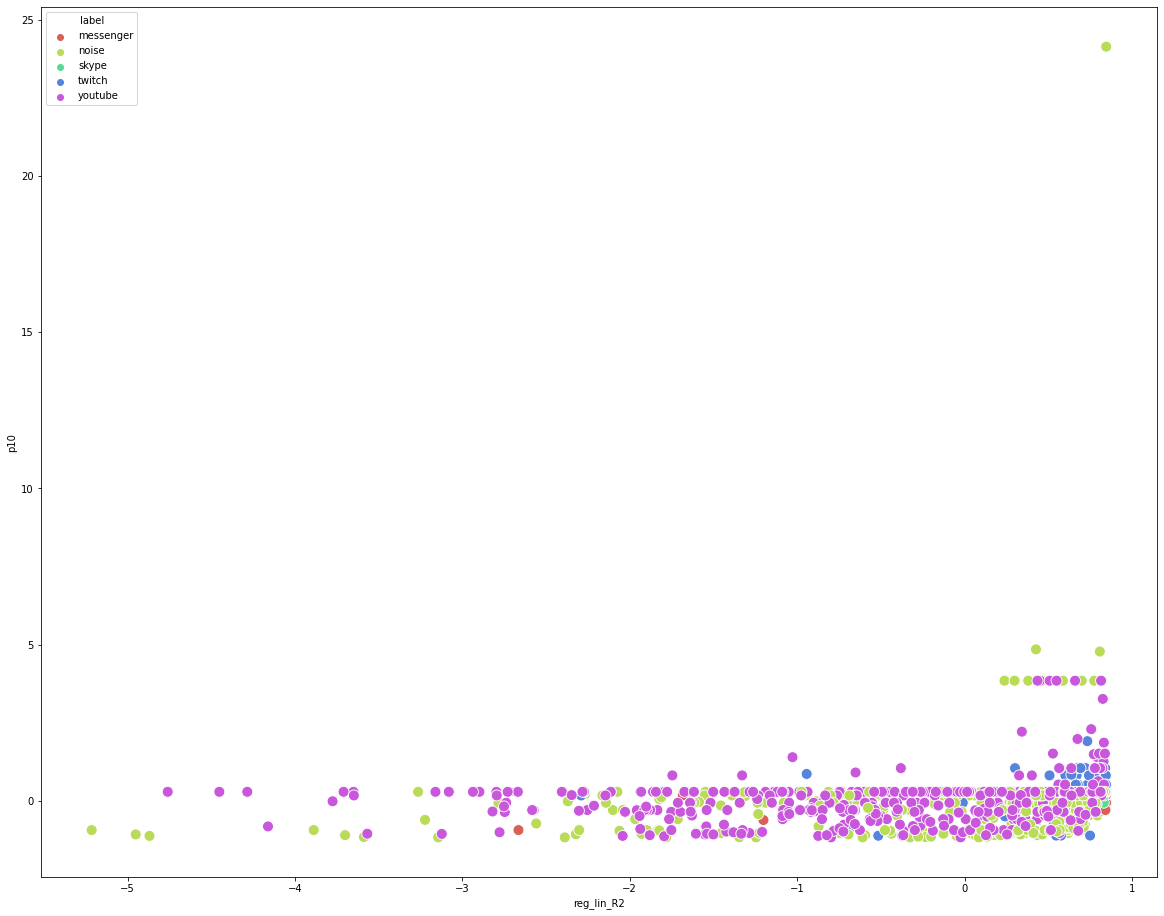

In [79]:
# Scaling
scaled_data = scale_data(data_in_metrics)

sns.scatterplot(x='reg_lin_R2' , y='p10', data=scaled_data, hue='label',s=120,palette='hls' )
plt.show()

In [81]:
scaled_data = scaled_data[scaled_data.label!="noise"]

In [82]:
my_model, X_test, y_test, str_labels = apply_classifier(scaled_data ,model = "RF", test = True, grid = False)

['messenger' 'skype' 'twitch' 'youtube']
Accuracy for our training dataset is : 1.00%
Accuracy on test set : 0.9126984126984127 %


In [83]:
apply_classifier(scaled_data ,model = "KNN", test = True, grid = False)

['messenger' 'skype' 'twitch' 'youtube']
Accuracy for our training dataset is : 0.93%
Accuracy on test set : 0.8571428571428571 %


(KNeighborsClassifier(),
 array([[ 0.36406665, -0.37921854, -0.08342255, ..., -0.72459736,
         -0.4011472 , -0.50628225],
        [ 0.46764342, -0.55039554, -0.08342255, ..., -1.03158693,
         -0.56826787, -0.83665687],
        [ 0.13531228, -0.25291865, -0.08342255, ...,  0.29800979,
         -0.30530664, -0.11816809],
        ...,
        [ 0.84204572,  0.93160379, -0.00521799, ...,  1.76865576,
          1.08500807,  0.40383964],
        [-2.11329525, -0.37605016, -0.08342255, ...,  0.61122212,
         -0.34077982,  0.07359656],
        [-1.7943404 ,  0.7588735 , -0.08342255, ...,  1.36141059,
          0.42570509,  2.18488881]]),
 array([[3],
        [3],
        [3],
        [0],
        [3],
        [3],
        [3],
        [3],
        [3],
        [2],
        [3],
        [3],
        [3],
        [3],
        [0],
        [2],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [2],
        [3],
        [3

In [84]:
apply_classifier(scaled_data ,model = "KNN", test = True, grid = True)

['messenger' 'skype' 'twitch' 'youtube']
Fitting 10 folds for each of 30 candidates, totalling 300 fits
0.9324055666003976
Accuracy for our training dataset is : 92.45%
Accuracy on test set : 0.8571428571428571 %


(GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                          23, 24, 25, 26, 27, 28, 29, 30]},
              scoring='accuracy', verbose=1),
 array([[ 0.36406665, -0.37921854, -0.08342255, ..., -0.72459736,
         -0.4011472 , -0.50628225],
        [ 0.46764342, -0.55039554, -0.08342255, ..., -1.03158693,
         -0.56826787, -0.83665687],
        [ 0.13531228, -0.25291865, -0.08342255, ...,  0.29800979,
         -0.30530664, -0.11816809],
        ...,
        [ 0.84204572,  0.93160379, -0.00521799, ...,  1.76865576,
          1.08500807,  0.40383964],
        [-2.11329525, -0.37605016, -0.08342255, ...,  0.61122212,
         -0.34077982,  0.07359656],
        [-1.7943404 ,  0.7588735 , -0.08342255, ...,  1.36141059,
          0.42570509,  2.18488881]]),
 array([[3],
        [3],
       

In [90]:
apply_classifier(scaled_data ,model = "RF", test = True, grid = True)

['messenger' 'skype' 'twitch' 'youtube']
Fitting 10 folds for each of 18 candidates, totalling 180 fits
1.0
Accuracy for our training dataset is : 95.63%
Accuracy on test set : 0.9126984126984127 %


(GridSearchCV(cv=10, estimator=RandomForestClassifier(),
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [15, 50, 100]},
              scoring='accuracy', verbose=1),
 array([[ 0.36406665, -0.37921854, -0.08342255, ..., -0.72459736,
         -0.4011472 , -0.50628225],
        [ 0.46764342, -0.55039554, -0.08342255, ..., -1.03158693,
         -0.56826787, -0.83665687],
        [ 0.13531228, -0.25291865, -0.08342255, ...,  0.29800979,
         -0.30530664, -0.11816809],
        ...,
        [ 0.84204572,  0.93160379, -0.00521799, ...,  1.76865576,
          1.08500807,  0.40383964],
        [-2.11329525, -0.37605016, -0.08342255, ...,  0.61122212,
         -0.34077982,  0.07359656],
        [-1.7943404 ,  0.7588735 , -0.08342255, ...,  1.36141059,
          0.42570509,  2.18488881]]),
 array([[3],
        [3],
        [3],
        [0],
        [3],
        [3],
      

In [85]:
from sklearn.metrics import plot_confusion_matrix

['messenger' 'skype' 'twitch' 'youtube']


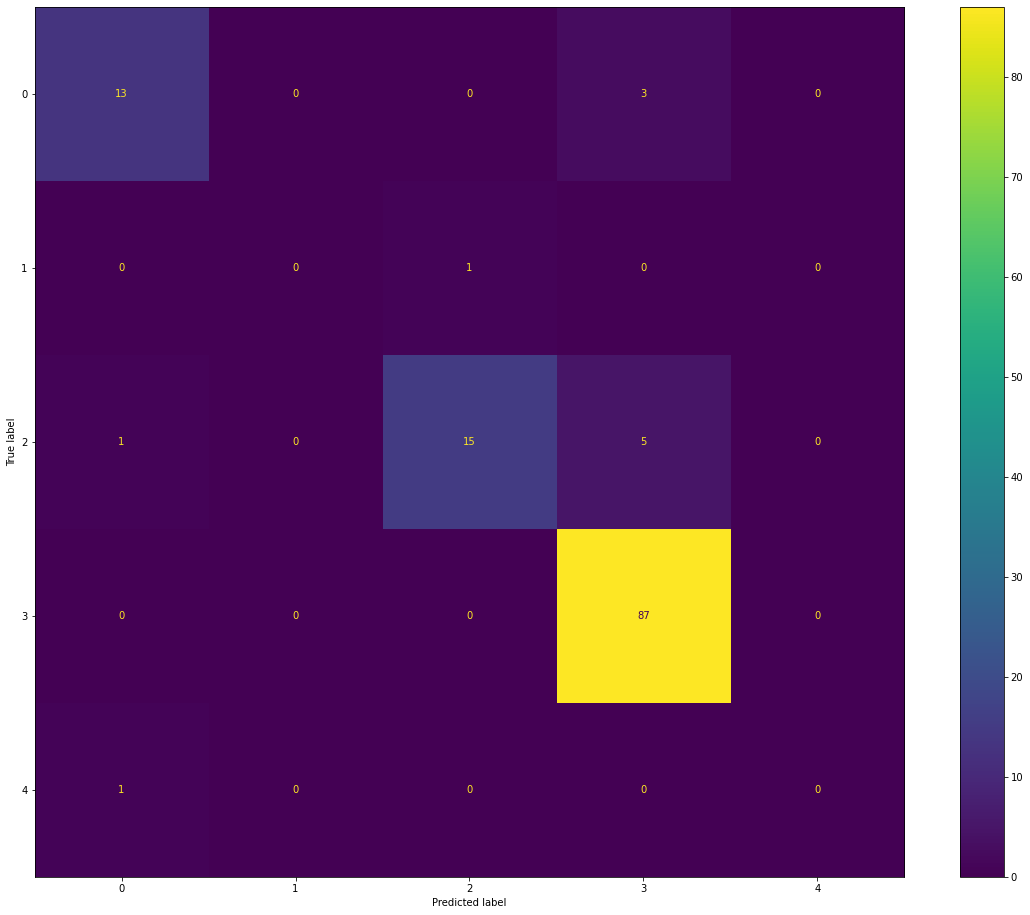

array(['messenger', 'skype', 'twitch', 'youtube'], dtype=object)

In [89]:
print(str_labels)

plot_confusion_matrix(my_model, X_test, y_test )
plt.show()


str_labels

[[ 11   4   0   1   1]
 [  0 107   0   3  15]
 [  0   0   0   1   0]
 [  0   3   0  19   2]
 [  1  15   0   0  57]]


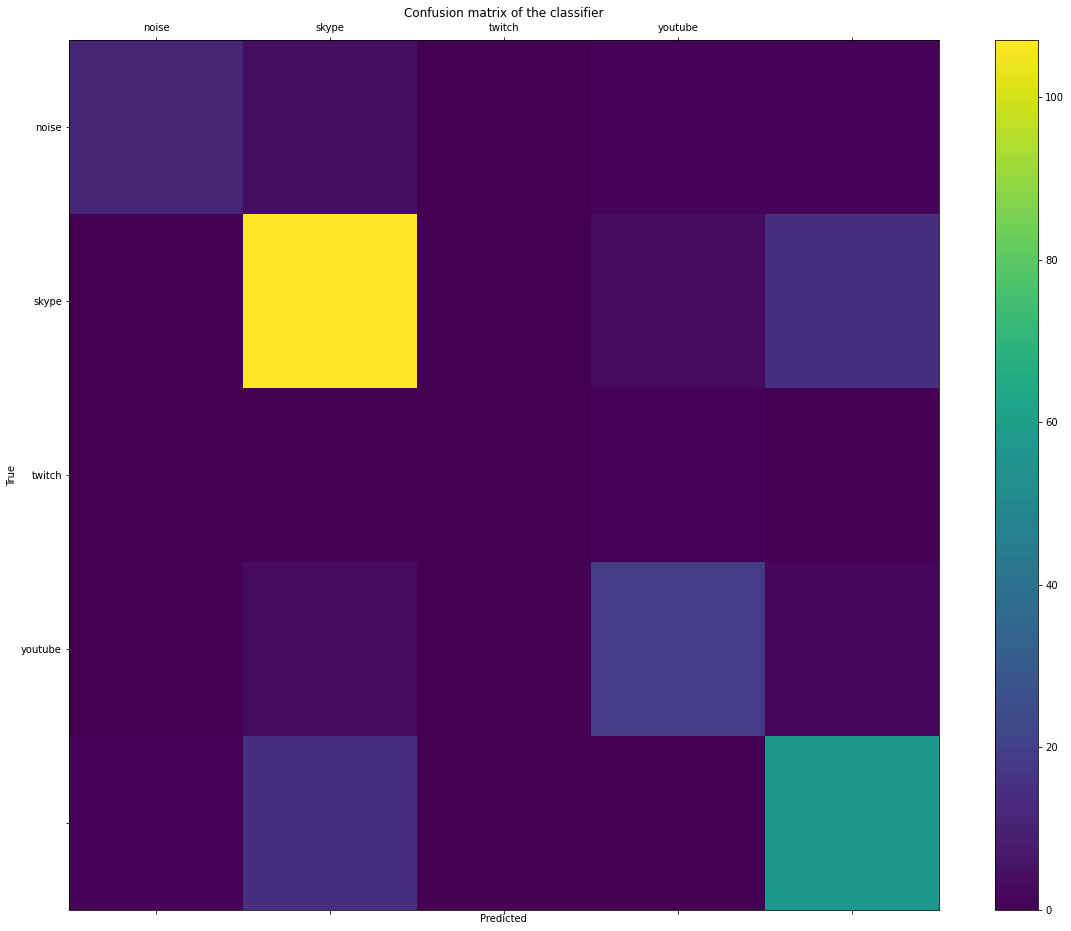

In [71]:
from sklearn.metrics import confusion_matrix
#my_model, X_test, y_test, str_labels


cm = confusion_matrix(y_test, my_model.predict(X_test))
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + str_labels)
ax.set_yticklabels([''] + str_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [69]:
list(str_labels)

['messenger', 'noise', 'skype', 'twitch', 'youtube']